<a href="https://colab.research.google.com/github/PulaKhundhanBargav/Cat-Vs-Dog-Classification/blob/main/cats_and_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 41.8MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.0MB/s]


In [4]:
import  zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [6]:
#Generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
#Creating CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))




In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 102ms/step - loss: 0.7710 - accuracy: 0.6064 - val_loss: 0.7170 - val_accuracy: 0.6274
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.5746 - accuracy: 0.6977 - val_loss: 0.5622 - val_accuracy: 0.7136
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4733 - accuracy: 0.7641 - val_loss: 0.4516 - val_accuracy: 0.7940
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4189 - accuracy: 0.7877 - val_loss: 0.4779 - val_accuracy: 0.7604
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3570 - accuracy: 0.8262 - val_loss: 0.4734 - val_accuracy: 0.7800
Epoch 6/10
625/625 [==============================] - 58s 93ms/step - loss: 0.3063 - accuracy: 0.8541 - val_loss: 0.5078 - val_accuracy: 0.7760
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2527 - accuracy: 0.8828 - val_loss: 0.5628 - val_accuracy

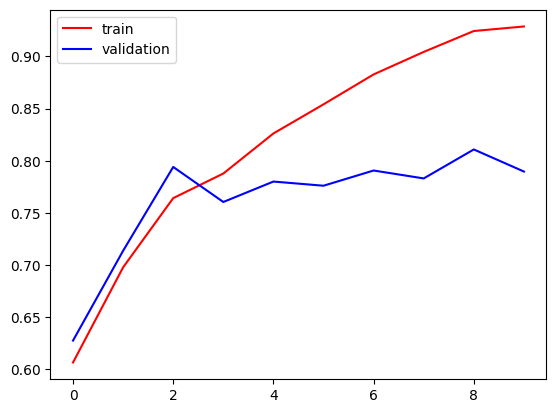

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

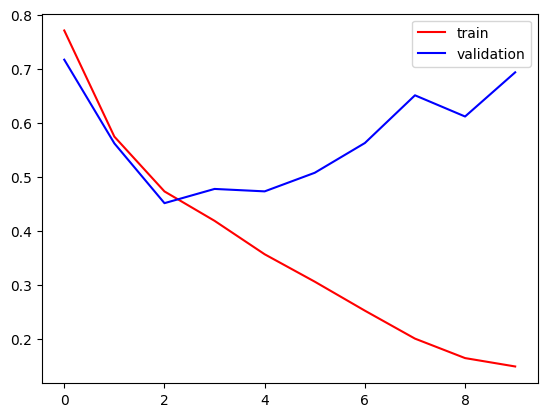

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
#add more data or reduce the complexity

In [17]:
import cv2

In [18]:
test_image = cv2.imread('/content/th.jpeg')

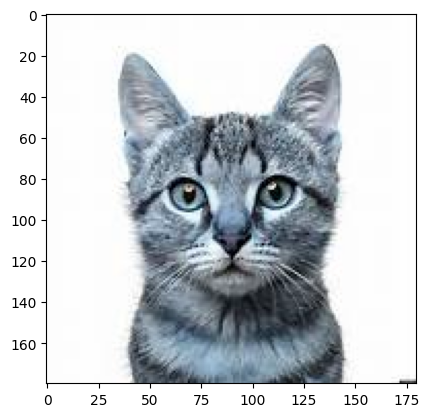

In [19]:
plt.imshow(test_image)

In [20]:
test_image.shape

(180, 180, 3)

In [21]:
test_image = cv2.resize(test_image,(256,256))

In [22]:
test_input = test_image.reshape(1,256,256,3)

In [23]:
model.predict(test_input)
#0 - cat
#1 -dog

1/1 [==============================] - 0s 413ms/step


array([[0.]], dtype=float32)